## Loading and visualizing the data

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt


In [5]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

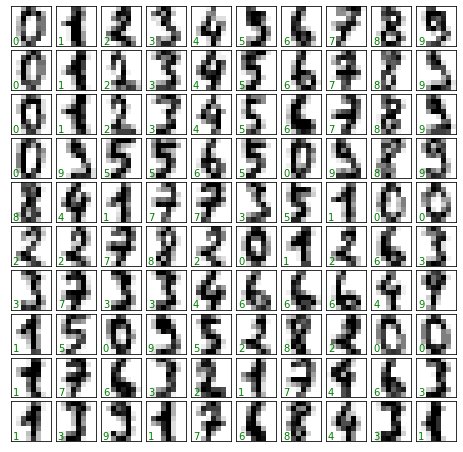

In [6]:
#The data contains 1797 samples. We'll only visualize the first 100 
fig, axes = plt.subplots(10, 10, figsize = (8,8), subplot_kw= {'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap= 'binary', interpolation= 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform =ax.transAxes, color= 'green')

## Dimensionality reduction
Since this data is in three dimensions we need to reduce it to two dimensions in order for us to work with it easily, [n_samples, n_features] representation.

In [11]:
X = digits.data
X.shape            #Number of samples and features

(1797, 64)

In [12]:
y = digits.target
y.shape             #Number of features

(1797,)

In [13]:
#To reduce the data from the 64-dimensional parameter space, we use an unsupervised method(Isomap).
from sklearn.manifold import Isomap       #1. Choose a model
iso = Isomap(n_components=2)              #2. Initialize the model
iso.fit(digits.data)                      #3. Apply model to data
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

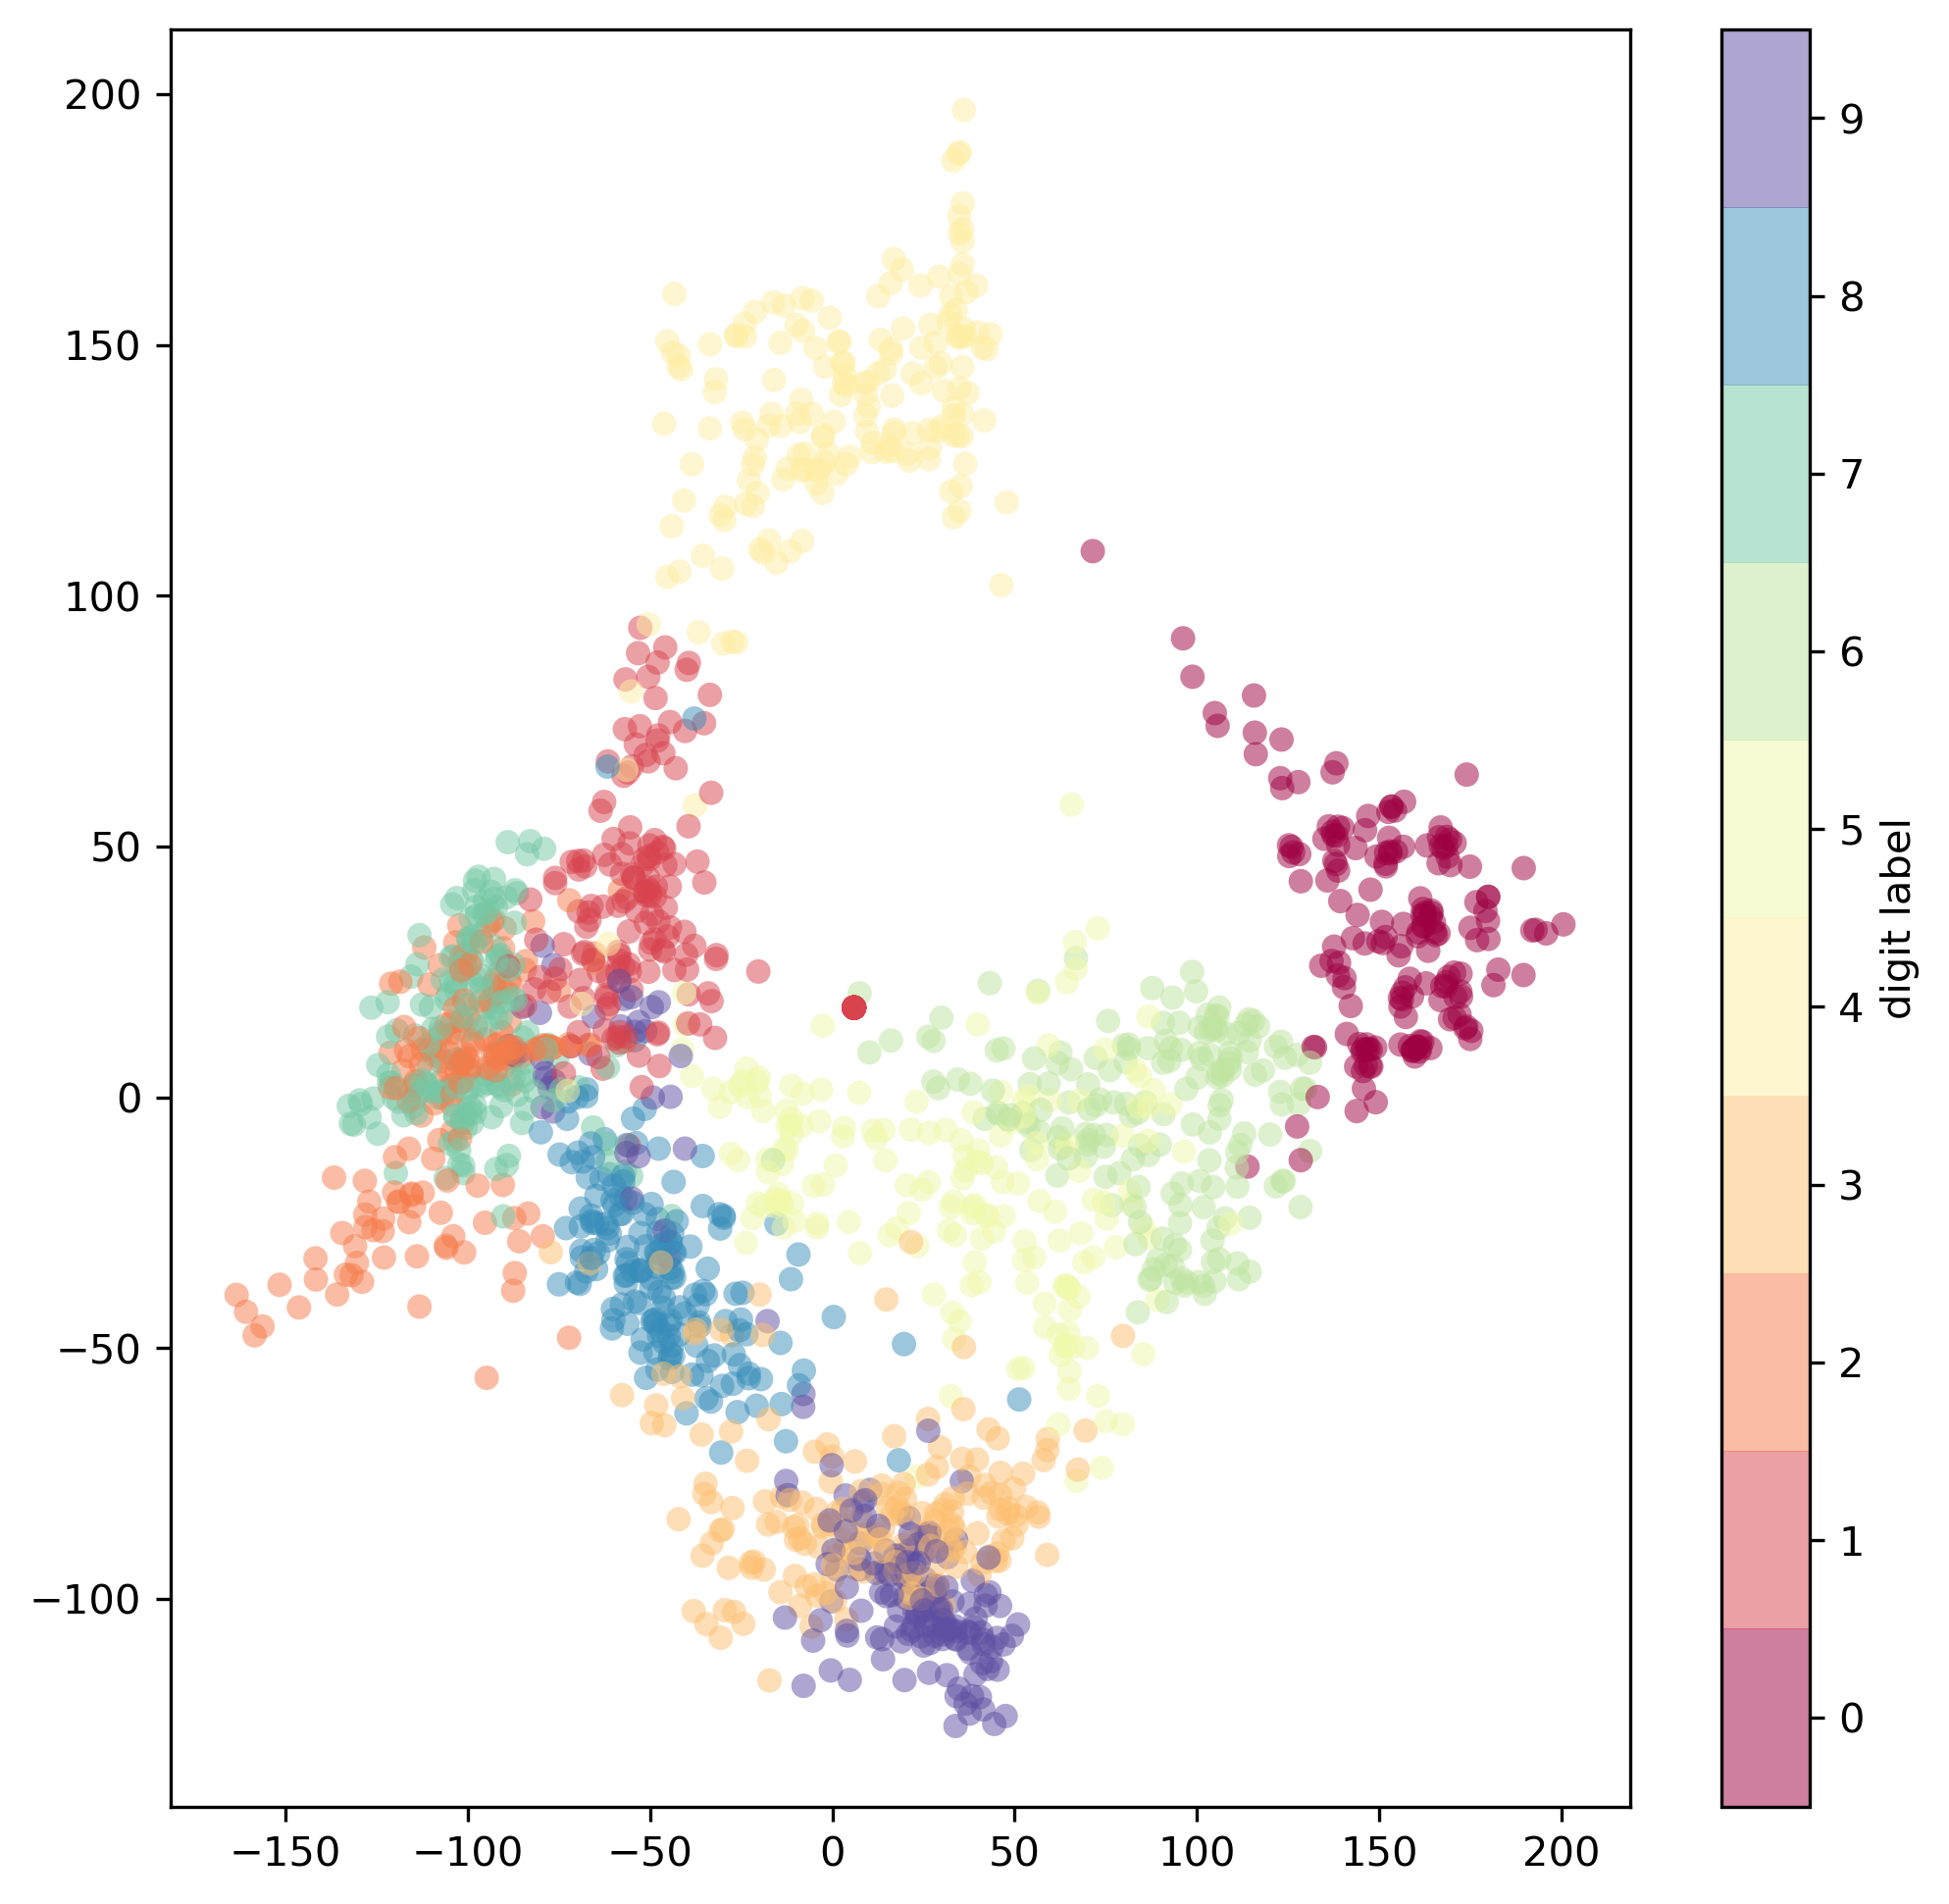

In [17]:
#The data is now 2D, let's plot it!
plt.figure(figsize=(8,8), dpi=300)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(18))
plt.clim(-0.5, 9.5);

#### From the data we can see that:
1. Zeros (in black) and ones (in purple) have very little overlap in parameter space. Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.

2. There seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with “hats” on them, which cause them to look similar to fours.

3. Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data. 

## Classification of the digits: Gaussian naive Bayes model

In [19]:
#Splitting the data into training set and testing set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [23]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

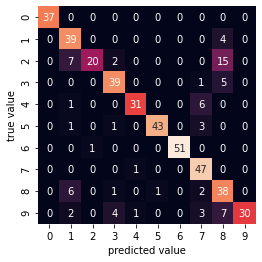

In [24]:
#Use the confusion matrix to see the mistakes
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value');

#### From above:
This shows us where the mislabeled points tend to be: for example, a large number of twos here are misclassified as either ones or eights.


#### Another way to see this is to plot the inputs again with their predicted labels

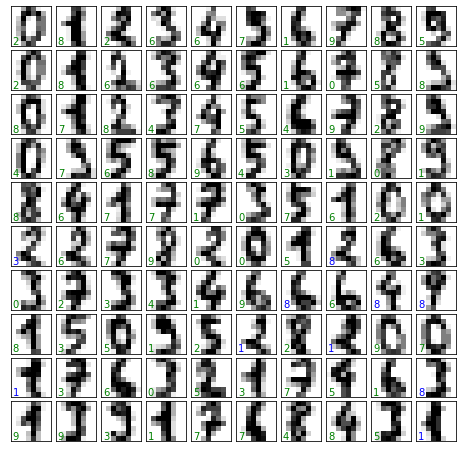

In [27]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw = {'xticks':[], 'yticks':[]}, gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation= 'nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color= 'green' if (ytest[i] ==y_model[i]) else 'blue')
    